# Lab-9
**NAME: SRINATH M KRISHNAN | NET ID: SMK220008**

## Load data

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
import h2o
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as pl
import random

import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.python import keras

In [13]:
data = pd.read_csv("lab_9_data.csv")

In [15]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,y
0,0.417138,-1.293612,-1.059303,-1.059527,0.381752,-0.430310,-0.307272,1.385823,0.589694,1.666701,...,6.527110,0.087006,-1.621985,-0.629728,2.651207,0.530446,-0.314525,0.842460,0.015583,1
1,-1.368996,-0.139701,-2.064799,0.337200,0.641051,-0.117311,0.473875,-1.071846,1.654553,0.056524,...,-13.584169,-0.375729,3.853924,0.777111,0.513734,0.088397,0.328591,1.062251,0.801070,0
2,1.935372,-1.312181,1.279396,-0.957400,0.847323,-0.500160,-1.132685,-2.781463,-1.545594,0.472310,...,1.035900,-0.133146,1.131425,0.515137,-0.553069,0.159660,-1.549426,0.164657,2.101127,1
3,-0.856339,0.328385,0.643745,-0.328504,-0.381893,-0.626916,0.539573,1.016995,0.873047,-0.455808,...,0.804224,-0.049558,4.160305,-0.581075,0.212196,-1.553463,-1.842163,-0.977414,-1.173794,1
4,1.182037,0.527509,-1.604039,-0.193111,-0.989075,-0.442528,-0.339171,-0.253943,2.228942,-0.495958,...,-1.023770,-1.479795,0.338839,-1.903866,-0.158133,0.960149,-0.047209,-0.572708,0.143018,1


In [19]:
X=data.drop('y', axis=1)
Y=data['y'].to_frame()

## Question 1

Use PCA to reduce the size of the feature space while retaining 90% of the explained variance. What is the size of the transformed feature space? (Number of features in the reduced dataset)

You should keep target column `y` as is (don't include in PCA)

In [31]:
# Initialize PCA to retain 90% of the variance
pca = PCA(n_components=0.9)

# Fit PCA on the standardized features
pca.fit(X)

# Transform the features to the principal components
X_pca = pca.transform(X)

# The size of the transformed feature space is the number of principal components
num_features_reduced = X_pca.shape[1]

print(f'The size of the transformed feature space: {num_features_reduced}')

The size of the transformed feature space: 128


## Question 2

Train two SVM model from `sklearn.svm.SVC` with kernel 'rbf', gamma = 'auto', and C = 10. 
Target column is `y`. 
- Model 1 will be trained on original data (after scaling)
- Model 2 will be trained on the dataset obtained after PCA with 130 components

Split data to Train and Test, 80/20 ratio. 

Report following metrics on the test dataset:
- Confusion matrix
- F1 weighted

Set random_state = 142 on all models and functions with this argument.

How the model tow model results are different?  
Argue in favor and against using PCA to reduce number of features in this scenario. Provide at least two arguments for each. 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=142)

# Standardize the original data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Initialize PCA with 130 components explicitly
pca_130 = PCA(n_components=130, random_state=142)

# Fit PCA on the training data and transform both training and test data
X_train_pca_130 = pca_130.fit_transform(X_train_scaled)
X_test_pca_130 = pca_130.transform(X_test_scaled)

In [45]:
# Initialize and train the SVM on the original scaled data
svm_original = SVC(kernel='rbf', gamma='auto', C=10, random_state=142)
svm_original.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set for the original data model
y_pred_original = svm_original.predict(X_test_scaled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       101
           1       0.85      0.79      0.82        99

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



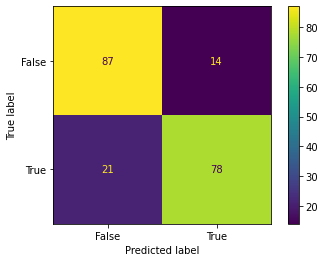

In [60]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_original), display_labels = [False, True])
cm_display.plot()

In [47]:
# Initialize and train the SVM on the PCA-reduced data
svm_pca = SVC(kernel='rbf', gamma='auto', C=10, random_state=142)
svm_pca.fit(X_train_pca_130, y_train)

# Predict and evaluate on the test set for the PCA-reduced data model
y_pred_pca = svm_pca.predict(X_test_pca_130)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       101
           1       0.82      0.83      0.82        99

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



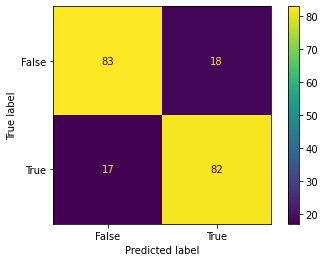

In [64]:
cm_display_2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_pca), display_labels = [False, True])
cm_display_2.plot()

**Model 1 (Original Data) vs. Model 2 (PCA with 130 Components):**

Precision: Model 1 has slightly lower precision for the positive class (1) compared to Model 2.

Recall: Model 1 has a lower recall for the positive class (1) compared to Model 2.

F1-Score: Both models have very similar F1-scores for both classes, indicating that the balance between precision and recall is almost the same for both.
Confusion Matrix: There are small differences in the confusion matrices. Model 2 correctly predicted more true positives but also had more false positives.

**In favor of using PCA:**

1. Reduces Complexity: PCA reduces the dimensionality of the data, which can simplify the model and potentially reduce the risk of overfitting. This could be particularly useful if the original feature space is very high-dimensional.

2. Computationally Efficient: Training on a dataset with reduced dimensionality is usually faster. This can be beneficial when working with very large datasets or when computational resources are limited.

**Against using PCA:**

1. Interpretability: The transformed features after PCA are linear combinations of the original features and often do not have a direct interpretation. This can make it difficult to understand how the features are influencing the model's predictions.

2. Information Loss: Although PCA can retain most of the variance with a subset of components, some information is inevitably lost. This could lead to the model missing out on subtle patterns in the data that could be important for predictions.

# Question 3

Train H2O GLRM model on the input dataset (minus column `y`).
Use following parameters to define model:
```
rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

```

The model will compress dataset to two features only.
Our goal is to understand what features ("col0" to col_199") are close to each other. We will use two-dimensional graph to do it.

Once you have produced graph, annotate points which are close. Annotate at least two pairs.

If you cannot produce graph, identify two pairs of points using Euclidian distance.


In [95]:
hf = h2o.H2OFrame(X)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [110]:
# Initialize the H2O cluster
h2o.init()

# Train the GLRM model
rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id="rank2",
                                             seed=1234,
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")
rank2_model.train(training_frame=hf)



Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,8 mins 52 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 months and 21 days
H2O_cluster_name:,H2O_from_python_srinathmurali_idiotk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.969 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


glrm Model Build progress: |█████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: rank2


Model Summary: 
    number_of_iterations    final_step_size    final_objective_value
--  ----------------------  -----------------  -----------------------
    200                     8.95522e-05        157717

ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 196953.21772035168
Misclassification Error (Categorical): 0.0

Scoring History: 
     timestamp            duration    iterations    step_size               objective
---  -------------------  ----------  ------------  ----------------------  ------------------
     2024-04-10 22:58:54  0.123 sec   0.0           1.05                    159462.71856861262
     2024-04-10 22:58:54  0.134 sec   1.0           1.1025                  159384.6845367774
     2024-04-10 22:58:54  0.144 sec   2.0           1.1576250000000001      159298.3347129712
     2024-04-10 22:58:54  0.154 sec   3.0           1.2155062500000002      159276.8032459948
     2024-04-10 22:58:54  0.164 sec   4.0           0.8103375000000002      159276.8032459948
     2024-04-10 22:58:54  0.174 sec   5.0           0.8508543750000002      158798.73541123205
     2024-04-10 22:58:54  0.184 sec   6.0           0.8933970937500002      158563.80318487188
     2024-04-10 22:58:54  0.194 sec   7.0           0.9380669484375003      158528.27810152547
     2024-04-10 22:58:54  0.204 sec   8.0           0.6253779656250001      158528.27810152547
     2024-04-10 22:58:54  0.214 sec   9.0           0.6566468639062502      158275.63761909478
---  ---                  ---         ---           ---                     ---
     2024-04-10 22:58:56  2.032 sec   190.0         0.00022553521154239147  157716.57957399308
     2024-04-10 22:58:56  2.043 sec   191.0         0.00015035680769492766  157716.57957399308
     2024-04-10 22:58:56  2.053 sec   192.0         0.00015787464807967406  157716.5780181186
     2024-04-10 22:58:56  2.064 sec   193.0         0.00016576838048365777  157716.57742249704
     2024-04-10 22:58:56  2.074 sec   194.0         0.00017405679950784067  157716.57646353843
     2024-04-10 22:58:56  2.084 sec   195.0         0.0001827596394832327   157716.57580439356
     2024-04-10 22:58:56  2.095 sec   196.0         0.00012183975965548847  157716.57580439356
     2024-04-10 22:58:56  2.106 sec   197.0         0.0001279317476382629   157716.57478701204
     2024-04-10 22:58:56  2.116 sec   198.0         0.00013432833502017604  157716.57346964057
     2024-04-10 22:58:56  2.127 sec   199.0         8.955222334678402e-05   157716.57346964057
[200 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [118]:
X = h2o.get_frame("rank2_full")
Y = rank2_model.archetypes()

In [126]:
archetypes_cols = rank2_model._model_json["output"]["archetypes"].as_data_frame().reset_index(drop=True).columns.to_list()
archetypes_y = pd.DataFrame({'Arch1':Y[0],'Arch2':Y[1], 'attribute':archetypes_cols[1:]})
archetypes_y.head(n=20)

,Arch1,Arch2,attribute
0,0.067340,-0.084983,col_0
1,0.065193,-0.123497,col_1
2,0.204717,-0.152098,col_2
3,-0.283952,0.351996,col_3
4,-0.103622,0.117302,col_4
5,0.066411,0.017768,col_5
6,0.015583,-0.015877,col_6
7,-0.615339,0.642226,col_7
8,-0.088711,0.032299,col_8
9,-0.021331,-0.008697,col_9


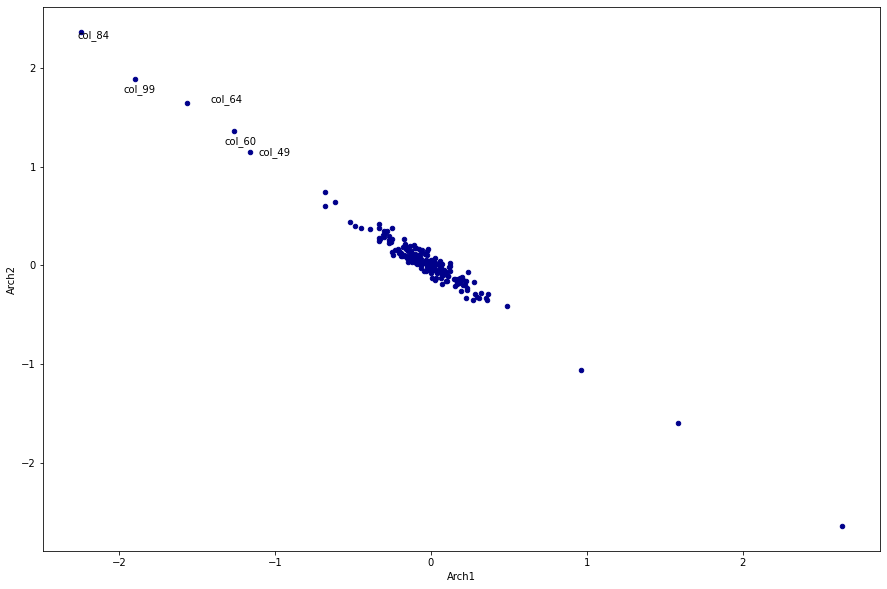

In [139]:
pl.rcParams['figure.figsize'] = [15, 10]

ax1 = archetypes_y.plot.scatter(x='Arch1',
                                y='Arch2',
                                c='DarkBlue')

for i, txt in enumerate(archetypes_cols[1:]):
    if txt in ['col_84','col_64','col_49','col_60','col_99']:
        ax1.annotate(txt, (Y[0][i]+random.uniform(-0.2,0.2), Y[1][i]+random.uniform(-0.2,0.2)))




## Question 4

Use notebook Tensorflow_image_classification_add_cnn_layer.ipynb as starting point.

Your goal is to reduce number of parameters in the last NN architecture:
```
model_cnn_with_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES)
])

model_cnn_with_drop.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
```
The above architecture uses 241,546 trainable params. Reduce number of layers/parameters so that final model has below 100k trainable params.  
Generate accuracy metric on Test dataset and produce graph with training/validation loss and accuracy for your improved model. 